In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

# Text Pre-processing libraries
import nltk
import string
import warnings
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

# Tensorflow imports to build the model.
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [63]:
df = pd.read_csv('https://raw.githubusercontent.com/Wajihboukhdhir/hate-speech-detection/refs/heads/main/Dataset---Hate-Speech-Detection-using-Deep-Learning.csv')
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [64]:
df.shape

(24783, 2)

In [65]:
import pandas as pd

# Assuming 'df' is your original DataFrame
df_grouped = df.groupby('class')

# Sample 100 rows for each group and store it in a new DataFrame
final_testing_df = df_grouped.apply(lambda x: x.sample(n=100, random_state=42) if len(x) >= 100 else x).reset_index(drop=True)

# Remove the sampled rows from the original DataFrame
df_remaining = df.loc[~df.index.isin(final_testing_df.index)].reset_index(drop=True)
df=df_remaining.copy()
# Display the new DataFrame and remaining DataFrame
print("New DataFrame with 100 rows per class:")
print(final_testing_df.shape)
print("\nRemaining DataFrame after removing sampled rows:")
print(df.shape)

New DataFrame with 100 rows per class:
(300, 2)

Remaining DataFrame after removing sampled rows:
(24483, 2)


<ipython-input-65-5334aa722d91>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_testing_df = df_grouped.apply(lambda x: x.sample(n=100, random_state=42) if len(x) >= 100 else x).reset_index(drop=True)


**0 - Hate Speech**

**1 - Offensive Language**

**2 - Neither**

<ipython-input-66-fb4dacc2dbd0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


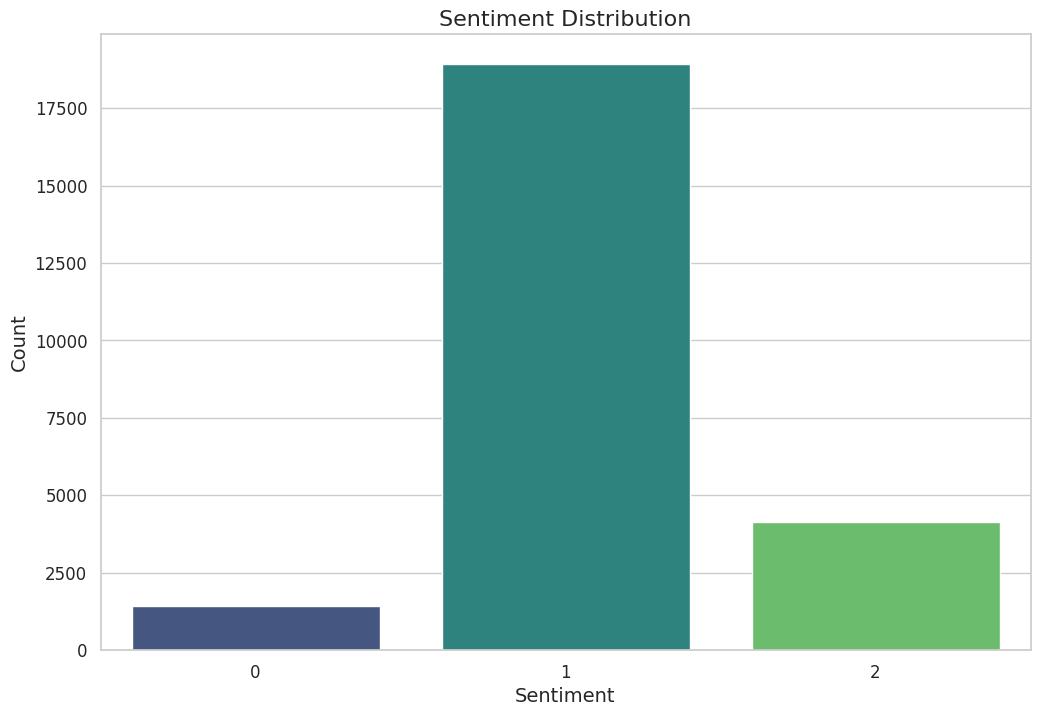

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment_counts = df["class"].value_counts()

# Create the bar chart
sns.set_theme(style="whitegrid")  # Set a theme
plt.figure(figsize=(12, 8))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")

# Add labels and title
plt.title("Sentiment Distribution", fontsize=16)
plt.xlabel("Sentiment", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the chart
plt.show()

In [67]:
df['tweet'] = df['tweet'].str.lower()


In [68]:
# Removing punctuations present in the text
# This line imports a predefined string containing all common punctuation marks from the string module.
punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)

df['tweet']= df['tweet'].apply(lambda x: remove_punctuations(x))
df.head()

,class,tweet
0,1,rapdreams bitches hold they nigga down when he...
1,1,simplycaitlin why do my friends hate me becaus...
2,1,adriwadrri no love for these fuck niggas hoes
3,1,airmaxlad1 hot meat httptcobrz8imk5vk sexy as ...
4,1,airmaxlad1 sniff httptcofhhbbrmybn perved up s...


In [69]:
# remove stop words and lemmatize
def remove_stopwords(text):
    stop_words = stopwords.words('english')

    imp_words = []

    # Storing the important words
    for word in str(text).split():

        if word not in stop_words:

            # Let's Lemmatize the word as well
            # before appending to the imp_words list.

            lemmatizer = WordNetLemmatizer()
            lemmatizer.lemmatize(word)

            imp_words.append(word)

    output = " ".join(imp_words)

    return output


df['tweet'] = df['tweet'].apply(lambda text: remove_stopwords(text))
df.head()

,class,tweet
0,1,rapdreams bitches hold nigga get locked nigga ...
1,1,simplycaitlin friends hate ratchet hoe
2,1,adriwadrri love fuck niggas hoes
3,1,airmaxlad1 hot meat httptcobrz8imk5vk sexy fuc...
4,1,airmaxlad1 sniff httptcofhhbbrmybn perved scal...


In [70]:
def generate_word_cloud(data, category):

    # Combine all tweets to form a single text corpus
    combined_corpus = " ".join(data['tweet'])

    # Configure and generate the word cloud
    wordcloud = WordCloud(
        max_words=100,
        width=200,
        height=100,
        collocations=False
    ).generate(combined_corpus)

    # Display the word cloud
    plt.figure(figsize=(10, 10))
    plt.title(f'Word Cloud for {category} emails', fontsize=15)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

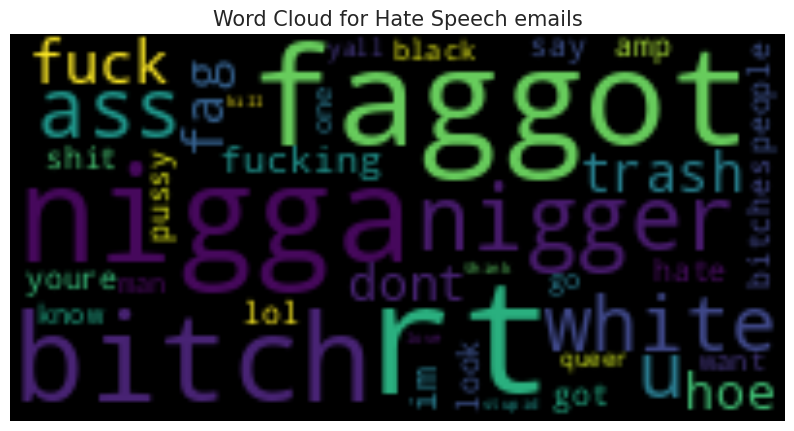

In [71]:
generate_word_cloud(df[df['class']==0], category='Hate Speech')

In [72]:
df['class'].value_counts()

,count
class,
1,18935
2,4126
0,1422


In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'df' is your original DataFrame
X = df.drop(columns=['class'])  # Features (excluding the target column)
y = df['class']  # Target variable

# Separate the classes
class_0 = df[df['class'] == 0]
class_1 = df[df['class'] == 1]
class_2 = df[df['class'] == 2]

# 1. Downsample the majority class (class 1)
class_1_downsampled = class_1.sample(class_0.shape[0] + class_2.shape[0], random_state=42)

# 2. Oversample the minority classes (class 0 and class 2) to match the size of the majority class (after downsampling)
class_0_oversampled = class_0.sample(class_1_downsampled.shape[0], replace=True, random_state=42)
class_2_oversampled = class_2.sample(class_1_downsampled.shape[0], replace=True, random_state=42)

# Combine all classes into a new balanced dataframe
balanced_df = pd.concat([class_1_downsampled, class_0_oversampled, class_2_oversampled])

# Shuffle the new dataframe to mix the samples
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Verify the class distribution
print(balanced_df['class'].value_counts())


class
1    5548
0    5548
2    5548
Name: count, dtype: int64


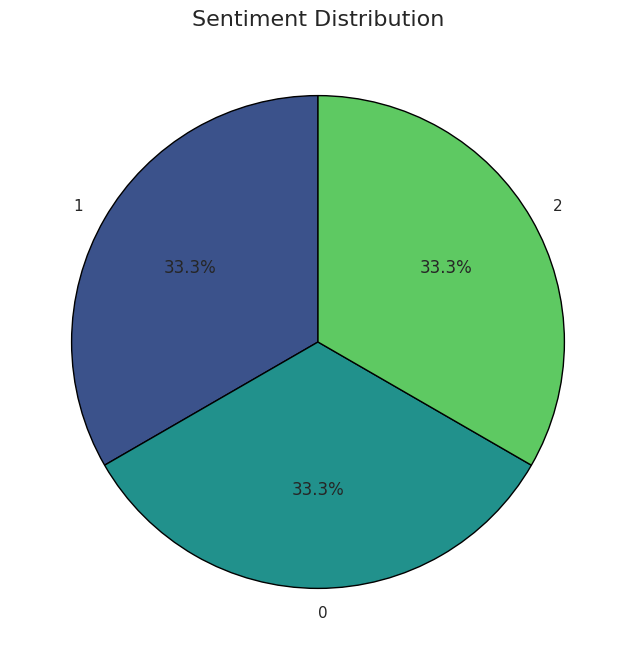

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment_counts = balanced_df["class"].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%',
        colors=sns.color_palette("viridis", len(sentiment_counts)).as_hex(), startangle=90, wedgeprops={'edgecolor': 'black'})

# Add a title
plt.title("Sentiment Distribution", fontsize=16)

# Show the chart
plt.show()


In [75]:
features = balanced_df['tweet']
target = balanced_df['class']

X_train, X_val, Y_train, Y_val = train_test_split(features,
                                                  target,
                                                  test_size=0.2,
                                                  random_state=22)
X_train.shape, X_val.shape

((13315,), (3329,))

In [76]:
Y_train = pd.get_dummies(Y_train)
Y_val = pd.get_dummies(Y_val)
Y_train.shape, Y_val.shape

((13315, 3), (3329, 3))

In [77]:
# training the tokenizer
max_words = 5000
token = Tokenizer(num_words=max_words,
                lower=True,
                split=' ')
token.fit_on_texts(X_train)

#Generating token embeddings
Training_seq = token.texts_to_sequences(X_train)
Training_pad = pad_sequences(Training_seq,
                            maxlen=50,
                            padding='post',
                            truncating='post')

Testing_seq = token.texts_to_sequences(X_val)
Testing_pad = pad_sequences(Testing_seq,
                            maxlen=50,
                            padding='post',
                            truncating='post')


In [78]:
print(Training_seq[0])
print(Training_pad[0])
print(X_train.values[0])

[283, 1004, 149, 3150, 657, 255, 3151]
[ 283 1004  149 3150  657  255 3151    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
sinai jihadi group beheads 3 accused spies jews httptco3cdoseli1k via breitbartnews


# **We are going to use Recurrent Neural Network (RNN), specifically a Bidirectional Long Short-Term Memory (BiLSTM) network.**

Architecture Summary:

*   Embedding layer: Converts input text into dense vectors.

*   Bidirectional LSTM layer: Processes sequences in both directions for better context capture.
*   Dense layer (512 units, ReLU): Adds non-linearity.
*   Kernel regularization (L1): Penalizes large weights.
*   Batch Normalization: Stabilizes learning by normalizing activations.
*   Dropout layer: Prevents overfitting by randomly deactivating neurons.
*   Dense layer (3 units, softmax activation): Output layer for classification.
*   Callbacks:

1.   EarlyStopping: Stops training when validation accuracy does not improve for 3 epochs.

2.   ReduceLROnPlateau: Reduces learning rate if validation loss doesn't improve for 2 epochs.




In [79]:
model = keras.models.Sequential([
    layers.Embedding(max_words, 32, input_length=50,input_shape=(50,)),
    layers.Bidirectional(layers.LSTM(16)),
    layers.Dense(512, activation='relu', kernel_regularizer='l1'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)             │ (None, 50, 32)              │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ (None, 32)                  │           6,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 512)                 │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 186,755 (729.51 KB)

 Trainable params: 185,731 (725.51 KB)

 Non-trainable params: 1,024 (4.00 KB)

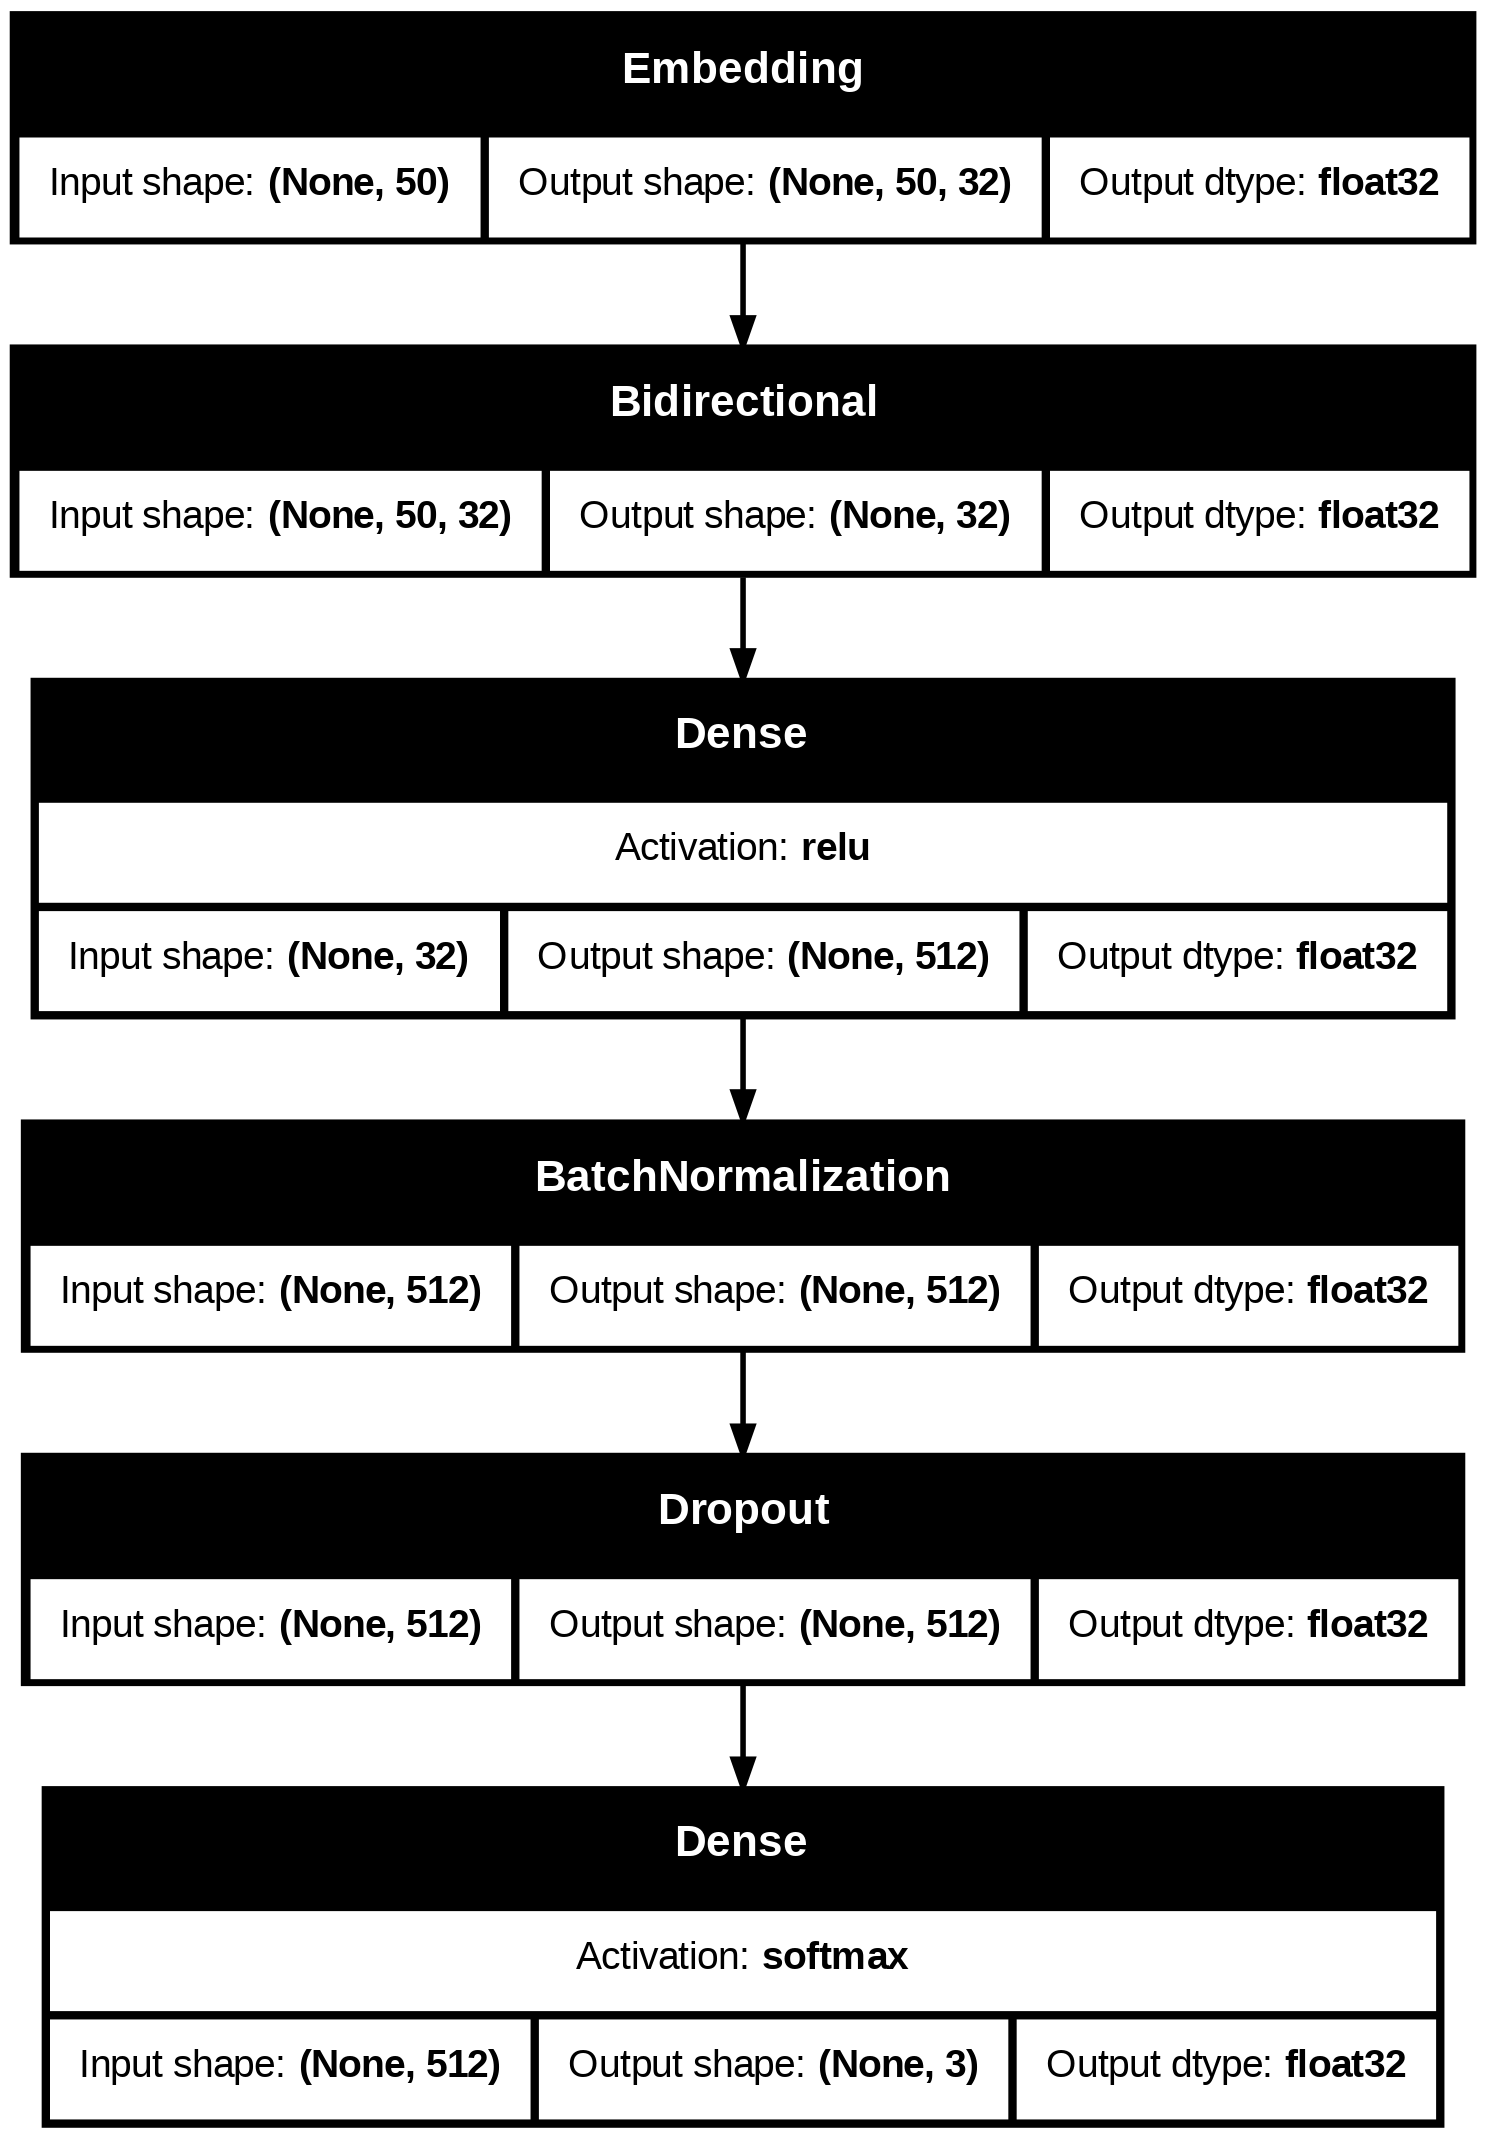

In [80]:
# Add a dummy input to build the model
model.build((None, 50))

keras.utils.plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

In [81]:
# EarlyStopping callback is used to stop training the model early if there is no improvement
# in the monitored metric for a specified number of epochs, preventing overfitting and saving time.
es = EarlyStopping(
    # The 'patience' parameter defines how many epochs with no improvement to wait before stopping training.
    patience=3,  # Stop after 3 epochs with no improvement.

    # The 'monitor' parameter specifies which metric to monitor for improvement.
    monitor='val_accuracy',  # Monitor validation accuracy.

    # The 'restore_best_weights' parameter ensures that the model weights are restored to the
    # best state observed during training (before any degradation in performance).
    restore_best_weights=True  # Restore the best weights from the epoch with the highest validation accuracy.
)


# ReduceLROnPlateau is a learning rate scheduler that reduces the learning rate when a metric has stopped improving.
# This helps to avoid overshooting the optimal solution as the training progresses.
lr = ReduceLROnPlateau(
    # The 'patience' parameter defines how many epochs with no improvement to wait before reducing the learning rate.
    patience=2,  # Reduce learning rate after 2 epochs with no improvement.

    # The 'monitor' parameter specifies which metric to monitor for improvement before reducing the learning rate.
    monitor='val_loss',  # Monitor the validation loss.

    # The 'factor' parameter defines by how much to reduce the learning rate when the condition is met.
    factor=0.5,  # Reduce the learning rate by half when the condition is met.

    # The 'verbose' parameter controls whether to print out messages when the learning rate is reduced.
    verbose=0  # No output messages when the learning rate is reduced.
)


In [82]:
import time
start_time = time.time()
history = model.fit(Training_pad, Y_train,
                    validation_data=(Testing_pad, Y_val),
                    epochs=50,
                    verbose=1,
                    batch_size=32,
                    callbacks=[lr, es])

end_time = time.time()
X = end_time - start_time

# Print the duration
print(f"Training duration: {X} seconds")

Epoch 1/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 22s 44ms/step - accuracy: 0.6916 - loss: 3.1707 - val_accuracy: 0.7309 - val_loss: 0.7999 - learning_rate: 0.0010
Epoch 2/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9165 - loss: 0.3278 - val_accuracy: 0.8937 - val_loss: 0.3769 - learning_rate: 0.0010
Epoch 3/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9426 - loss: 0.2373 - val_accuracy: 0.7675 - val_loss: 0.7450 - learning_rate: 0.0010
Epoch 4/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9560 - loss: 0.1985 - val_accuracy: 0.7552 - val_loss: 0.7782 - learning_rate: 0.0010
Epoch 5/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.9667 - loss: 0.1511 - val_accuracy: 0.8910 - val_loss: 0.4104 - learning_rate: 5.0000e-04
Training duration: 106.62741303443909 seconds


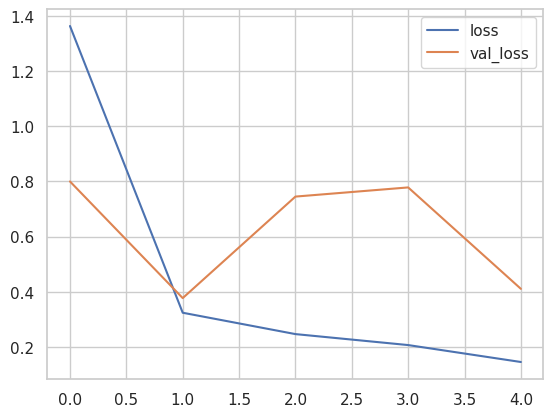

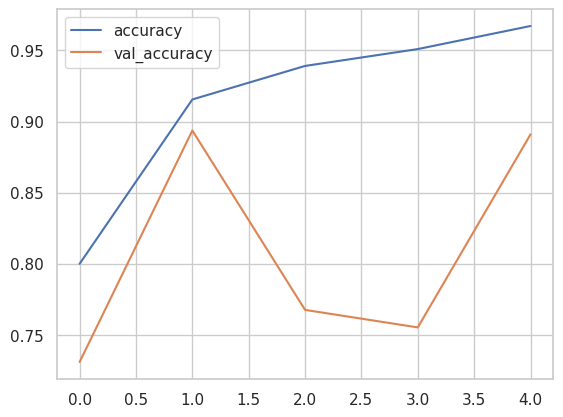

In [83]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

In [84]:
# training the tokenizer
max_words = 5000
token = Tokenizer(num_words=max_words,
                lower=True,
                split=' ')
token.fit_on_texts(X_train)


#Generating token embeddings
final_testing_seq = token.texts_to_sequences(final_testing_df['tweet'])
final_testing_pad = pad_sequences(final_testing_seq,
                            maxlen=50,
                            padding='post',
                            truncating='post')

In [85]:
print(final_testing_seq[0])
print(final_testing_pad[0])


[2433, 3, 98, 13, 4355, 132, 44]
[2433    3   98   13 4355  132   44    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [86]:
# Generate predictions
Y_final_test = final_testing_df['class']
Y_final_test = pd.get_dummies(Y_final_test)
predictions = model.predict(final_testing_pad)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


In [87]:
predictions

array([[9.98030663e-01, 1.94119313e-03, 2.81835710e-05],
       [2.61823714e-01, 5.47634244e-01, 1.90542027e-01],
       [9.96537089e-01, 2.37758551e-03, 1.08536915e-03],
       [4.23221350e-01, 1.76029265e-01, 4.00749415e-01],
       [7.39544809e-01, 2.26657271e-01, 3.37979198e-02],
       [9.62084353e-01, 2.88792234e-02, 9.03632492e-03],
       [8.93042028e-01, 9.73728374e-02, 9.58518218e-03],
       [9.79739428e-01, 1.96932200e-02, 5.67429117e-04],
       [9.66034830e-01, 3.00549027e-02, 3.91028123e-03],
       [8.69937658e-01, 1.14529148e-01, 1.55332340e-02],
       [6.69333100e-01, 3.25834155e-01, 4.83265286e-03],
       [2.33736515e-01, 1.12405539e-01, 6.53858006e-01],
       [9.47712839e-01, 3.69473509e-02, 1.53398346e-02],
       [9.55887854e-01, 4.40960191e-02, 1.62303204e-05],
       [8.67462158e-01, 1.31124884e-01, 1.41302997e-03],
       [8.67612481e-01, 9.97023061e-02, 3.26851048e-02],
       [9.19872522e-01, 4.15135361e-02, 3.86139154e-02],
       [8.19508255e-01, 1.51729

In [88]:
from sklearn.metrics import classification_report

# Assuming predictions are probabilities, convert to class labels
predicted_classes = predictions.argmax(axis=1)  # Get the index of the max probability
true_classes = Y_final_test.values.argmax(axis=1)  # Convert one-hot to class labels




In [89]:
predicted_classes

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2,
       1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [90]:
true_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [91]:
# Generate classification report
report = classification_report(true_classes, predicted_classes)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       100
           1       0.91      0.78      0.84       100
           2       0.86      0.98      0.92       100

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.87       300
weighted avg       0.88      0.88      0.87       300



In [92]:
model.save('hate-speech-detection.h5')


In [93]:
import pickle

with open('model.pkl', 'wb') as files:
    pickle.dump(model,files )

# Recurrent Neural Network (RNN), specifically a ***Bidirectional Gated Recurrent Unit (BiGRU) network***. have fewer parameters since they use a simpler structure

---

with fewer gates. This often leads to faster training times and less memory usage compared to LSTM.
Architecture Summary:

*   Embedding layer: Converts input text into dense vectors.
*   Bidirectional GRU layer: Processes sequences in both directions, capturing better context using Gated Recurrent Units (GRU) with 16 units.



*   Dense layer (512 units, ReLU): Adds non-linearity.
*   Kernel regularization (L1): Penalizes large weights to prevent overfitting.
*   Dropout layer: Prevents overfitting by randomly deactivating neurons during training.
*   Batch Normalization: Stabilizes learning by normalizing activations.
*   Dense layer (3 units, softmax activation): Output layer for classification into 3 categories.
*   Callbacks:

1.   EarlyStopping: Stops training when validation accuracy does not improve for 3  epochs, restoring the best weights from the epoch with the highest validation accuracy.
2.   ReduceLROnPlateau: Reduces the learning rate by a factor of 0.5 if validation loss doesn't improve for 2 epochs.




In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding,SimpleRNN
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Bidirectional


model = Sequential()
model.add(Embedding(max_words,32,input_length = 50,input_shape=(50,)))
model.add(Bidirectional(GRU(units=16)))
model.add(Dense(512,activation='relu',kernel_regularizer='l1'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(3,activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [95]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)             │ (None, 50, 32)              │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (None, 32)                  │           4,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 512)                 │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,283 (723.76 KB)

 Trainable params: 184,259 (719.76 KB)

 Non-trainable params: 1,024 (4.00 KB)

In [96]:
es = EarlyStopping(patience=3,
                   monitor = 'val_accuracy',
                   restore_best_weights = True)

lr = ReduceLROnPlateau(patience = 2,
                       monitor = 'val_loss',
                       factor = 0.5,
                       verbose = 0)

In [97]:
import time
start_time = time.time()

history = model.fit(Training_pad, Y_train,
                    validation_data=(Testing_pad, Y_val),
                    epochs=50,
                    verbose=1,
                    batch_size=32,
                    callbacks=[lr, es])
end_time = time.time()
X = end_time - start_time

# Print the duration
print(f"Training duration: {X} seconds")

Epoch 1/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 27s 55ms/step - accuracy: 0.6242 - loss: 3.2936 - val_accuracy: 0.7732 - val_loss: 0.7697 - learning_rate: 0.0010
Epoch 2/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.9092 - loss: 0.3582 - val_accuracy: 0.8795 - val_loss: 0.4119 - learning_rate: 0.0010
Epoch 3/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.9422 - loss: 0.2583 - val_accuracy: 0.8907 - val_loss: 0.3687 - learning_rate: 0.0010
Epoch 4/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - accuracy: 0.9605 - loss: 0.1947 - val_accuracy: 0.8982 - val_loss: 0.4039 - learning_rate: 0.0010
Epoch 5/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.9645 - loss: 0.1763 - val_accuracy: 0.8964 - val_loss: 0.4292 - learning_rate: 0.0010
Epoch 6/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9731 - loss: 0.1314 - val_accuracy: 0.9135 - val_loss: 0.3778 - learning_rate: 5.0000e-04
Epoch 7/50
417/417 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.9802

In [98]:
predictions = model.predict(final_testing_pad)

from sklearn.metrics import classification_report

# Assuming predictions are probabilities, convert to class labels
predicted_classes = predictions.argmax(axis=1)  # Get the index of the max probability
true_classes = Y_final_test.values.argmax(axis=1)  # Convert one-hot to class labels


# Generate classification report
report = classification_report(true_classes, predicted_classes)

print("Classification Report:")
print(report)



10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       100
           1       0.82      0.88      0.85       100
           2       0.92      0.89      0.90       100

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300

